<a href="https://colab.research.google.com/github/ThiagoGonzalezz/TP6_SIMULACION/blob/main/Glovo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento y ajuste de datos mediante el uso de Python y Google Colab

El objetivo de este trabajo consiste en:

1.   Realizar el procesamiento de un set de datos de transporte mediante el uso del lenguaje programación Python y las bibliotecas Pandas y Numpy, utilizando el entorno de Google Colab.
2.   Obetener información necesaria del dataset con Pandas y desarrollar visualizaciones básicas de los datos mediante la librería MatPlotlib.
3.   Ajustar los datos de origen a una serie de funciones de densidad de probabilidad sugeridas, mediante el uso de la biblioteca Fitter.
4.   Con la obtención de la(s) fdp(s) sugeridas, simular un array de datos y verificar por medio de gráficos o un nuevo ajuste, que los datos generados son de características similares a los de orígen.

Este análisis lo realizaremos mediante el entorno de Google Colab. Pueden investigar más sobre este entorno y sus funcionalidades en el siguiente link:

https://colab.research.google.com/

Como se puede observar, este mismo documento es un cuaderno (o también llamado Notebook) de Google Colab.

Las notebooks tienen dos tipos de celdas:
1. **Código**: En dónde podemos introducir código Python, ejecutarlo y ver el resultado.
2. **Texto**: Podemos incluir como un documento, código HTML, LaTex, imágenes y demás.


**Importante**: Para replicar el análisis de este notebook, deberán realizarse una copia del mismo (Menú: Archivo -> Guardar una copia en Drive).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 1. Importación de bibliotecas

En este primer paso importamos todas las bibliotecas necesarias para realizar nuestro procesamiento de datos. Numpy y Pandas para el manejo de datos y Matplotlib para gráficos.

Generalmente es buena práctica utilizar alias para los nombres de estas bibliotecas (np, pd y plt) cuando se las importa.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 2. Carga de datos

Debido a que nuestro dataset a procesar es un archivo excel, utilizaremos la función *read_excel* de la biblioteca Pandas.

Los detalles del uso de esta función se encuentran en el siguiente link:
[pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

En este código de ejemplo, el archivo a leer se encuentra en una carpeta de Google Drive propia, que previamente hay que "montar" mediante el menú de la izquierda.
En los parámetros que le pasamos a read_excel debemos poner el link de nuestra ubicación del archivo que nos guardamos en nuestro drive.

Los datos leídos los cargamos en una variable que llamamos *transporte_datos*.

Observese que mediante el parámetro sheet_name le indicamos que hoja del excel vamos a cargar.

Se puede bajar y cargar el dataset (FINAL_HORAS_NOVIEMBRE_Nacional_DF.xlsx) del siguiente [link](https://docs.google.com/spreadsheets/d/18CtL-RQgNgEHLrjOKtlGOwPpfM6FgEt_/edit?usp=sharing&ouid=103939068473979530439&rtpof=true&sd=true).


In [ ]:
# Atención: modificar la ubicación del archivo en donde lo tengan en su propio drive
transporte_datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Simulacion/Datos/FINAL_HORAS_NOVIEMBRE_Nacional_DF.xlsx", sheet_name='Datos')

Con la instrucción *type* podemos ver que esta última varible se trata de un *DataFrame* de Pandas.

In [ ]:
type(transporte_datos)

pandas.core.frame.DataFrame

Podemos pensar a un DataFrame como una típica tabla que alguna vez utilizamos en un motor de bases de datos o simplemente en Excel.

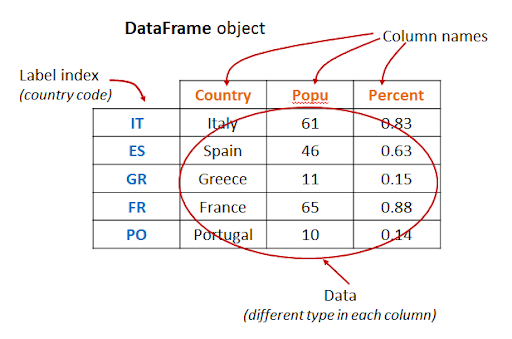

## 3. Análisis exploratorio de datos

### Dimensionalidad

Lo primero que podemos realizar con nuestro DataFrame es ver su "dimensionalidad" (Cantidad de filas por columnas).
Para ello utilizamos el atributo [*shape*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) de Pandas.

In [ ]:
transporte_datos.shape

(43422, 10)

Podemos ver el contenido de los primeros registros del DataFrame mediante la función  [*head()*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

Podemos pasar como parámetro la cantidad de primeros x registros a ver. En el siguiente ejemplo, los 10 primeros:

In [ ]:
transporte_datos.head(10)

,AMBA,GRUPO,DIA,EMPRESA,LINEA,INTERNO,HORAS,SUMA_KM,SUMA_MINUTOS,JURISDICCION
0,SI,DF,13/11/2023,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 44,4,0.00,0.19,0,NACIONAL
1,SI,DF,16/11/2023,NUEVOS RUMBOS S.A.T.A.C.I.F.I.,LINEA 132,108,0.00,0.07,0,NACIONAL
2,SI,DF,17/11/2023,COLECTIVEROS UNIDOS S.A.,LINEA_099,4546,0.00,0.05,0,NACIONAL
3,SI,DF,19/11/2023,LINEA DE MICROOMNIBUS 47 S.A.T.C.F.I.,LINEA 47,107,0.00,0.04,0,NACIONAL
4,SI,DF,10/11/2023,M.O.D.O. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 151,419,0.02,0.33,1,NACIONAL
5,SI,DF,19/11/2023,M.O.D.O. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 90,468,0.02,0.07,1,NACIONAL
6,SI,DF,08/11/2023,COLECTIVEROS UNIDOS S.A.,LINEA_099,4569,0.02,0.49,1,NACIONAL
7,SI,DF,11/11/2023,MICROOMNIBUS BARRANCAS DE BELGRANO S.A.,LINEA 118,36,0.02,0.06,1,NACIONAL
8,SI,DF,10/11/2023,LINEA DE MICROOMNIBUS 47 S.A.T.C.F.I.,LINEA 47,143,0.03,2.12,2,NACIONAL
9,SI,DF,23/11/2023,TRANSPORTES SOL DE MAYO C.I.S.A.,LINEA 4,4,0.03,0.27,2,NACIONAL


### Tipos de datos
Oberservamos los tipos de datos de cada una de las columnas con el atributo [*dtypes*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html).

In [ ]:
transporte_datos.dtypes

AMBA             object
GRUPO            object
DIA              object
EMPRESA          object
LINEA            object
INTERNO           int64
HORAS           float64
SUMA_KM         float64
SUMA_MINUTOS      int64
JURISDICCION     object
dtype: object

Para este trabajo, nos interesa la columna "HORAS" y vemos que la misma es de tipo float.

Si la columna que queremos trabajar fuese de tipo "object" deberíamos previamente converirlo a tipo integer o floar mediante la función [*astype*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html).

### Inspección de datos nulos

Una forma de verificar si el DataFrame contiene datos nulos es mediante la función isnull(). Si agregarmos sum() obtenemos el total de nulos por columnas.
En nuestro dataset observamos que no tenemos datos nulos.

In [ ]:
transporte_datos.isnull().sum()

AMBA            0
GRUPO           0
DIA             0
EMPRESA         0
LINEA           0
INTERNO         0
HORAS           0
SUMA_KM         0
SUMA_MINUTOS    0
JURISDICCION    0
dtype: int64

### Acceso a datos

Para acceder a los datos de una columna específica de un DataFrame podemos utilizar el operador punto (.), es decir ponemos el nombre del DF, más un . y el nombre de la columna. De esta manera:

In [ ]:
transporte_datos.HORAS

0         0.00
1         0.00
2         0.00
3         0.00
4         0.02
         ...  
43417    23.98
43418    23.98
43419    23.98
43420    23.98
43421    24.00
Name: HORAS, Length: 43422, dtype: float64

Esto último lo podemos hacer si el nombre de la columna no tiene espacios en su nombre. Si fuese así, podemos acceder a los datos de la columna mediante el uso de corchetes []., De esta manera:


In [ ]:
transporte_datos['HORAS']

0         0.00
1         0.00
2         0.00
3         0.00
4         0.02
         ...  
43417    23.98
43418    23.98
43419    23.98
43420    23.98
43421    24.00
Name: HORAS, Length: 43422, dtype: float64

## 4. Visualización de Datos

Es buena práctica recurrir a una visualización para obtener un panorama de la distribución de nuestros datos.

Recurrimos a la biblioteca [Matplotlib](https://matplotlib.org/) para graficar un histograma o gráfico de frecuencia.

Para construir este gráfico utilizamos la función hist de Matplotlib y pasamos como parámetros la columna con los valores que queremos contar (HORAS) y la cantidad de rangos o bins que consideramos para nuestros datos. En este ejemplo tomamos 200.


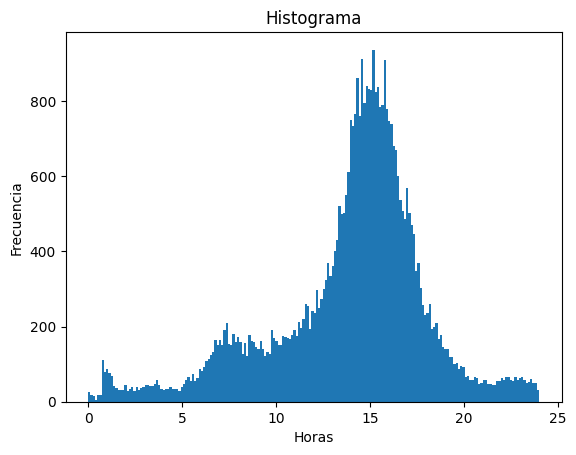

In [ ]:
# Histograma de HORAS
plt.title("Histograma")
plt.xlabel("Horas")
plt.ylabel("Frecuencia")
plt.hist(transporte_datos.HORAS, bins=200)
plt.show()

## 5. Ajuste de Datos

Para poder ajustar nuestros datos a una fdp conocida es necesario que previamente instalemos en nuestro entorno Colab el paquete de la [biblioteca Fitter](https://fitter.readthedocs.io/en/latest/).

La instalación se realiza fácilmente mediante la instrucción [*pip install*](https://pip.pypa.io/en/stable/cli/pip_install/).

Una vez instalado el paquete, se nos pedirá reiniciar el entorno de Colab.

In [ ]:
pip install fitter

Ahora si podemos importar la [librería Fitter](https://fitter.readthedocs.io/en/latest/#what-is-it) propiamente.

In [ ]:
#Importamos fitter
from fitter import Fitter

Cargamos los datos de la columna de nuestro DataFrame que queremos ajustar en una variable que llamamos "f".

In [ ]:
f = Fitter(transporte_datos.HORAS)

**La** función fit() de Fitter ajusta los datos recorriendo más de 80 distribuciones disponibles de la biblioteca scipy que previamente importamos. Podríamos indicarle en forma de lista, distribuciones con las cuales queremos que realice la prueba de ajuste, si es que conocemos de antemano que nuestros datos ajustará a alguna de ellas. Por ejemplo así:

`fit(datos, distributions=['gamma','rayleigh','uniform'])`

Tener en cuenta que si no pasamos ningún parámetro, la función fit() escaneará las 80 funciones de scipy y demorará varios minutos en el proceso.

In [ ]:
f.fit()

2024-04-08 01:13:39.740 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-04-08 01:13:44.489 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.138066)
2024-04-08 01:13:45.993 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.296196)
2024-04-08 01:13:47.275 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.081928)
2024-04-08 01:13:57.434 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.381642)
2024-04-08 01:13:58.760 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.136815)
2024-04-08 01:14:00.306 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.210532)
2024-04-08 01:14:13.432 | INFO     | fitter.fitter:_fit_single_distribution:337 - F

La función sumary():

`summary(Nbest=5, lw=2, plot=True, method='sumsquare_error', clf=True)`

grafica la distribución de las N mejores distribuciones.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rel_breitwigner,0.004730,750.982059,777.018223,0.023131,0.024624,2.639827e-23
skewcauchy,0.008598,802.509844,828.546008,0.029611,0.061437,6.359632e-143
laplace_asymmetric,0.009795,775.015271,801.051436,0.030226,0.030433,2.259675e-35
norminvgauss,0.010492,788.727538,823.442424,0.035661,0.036244,5.385677e-50
johnsonsu,0.010913,790.701160,825.416046,0.035979,0.033778,1.768122e-43
cauchy,0.011200,811.194603,828.552046,0.044686,0.067119,1.605374e-170
gennorm,0.016289,787.669459,813.705624,0.050965,0.064893,2.027708e-159
dweibull,0.017476,786.399838,812.436003,0.052735,0.067481,2.289882e-172
dgamma,0.017782,789.789898,815.826062,0.053925,0.065763,1.032919e-163
loglaplace,0.018280,787.945119,813.981284,0.055383,0.065149,1.125902e-160


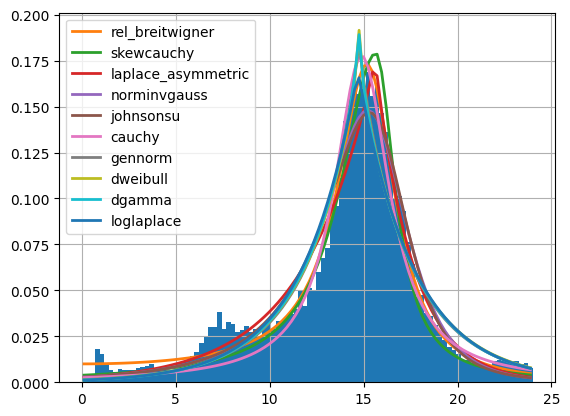

In [ ]:
f.summary(10)

Fitter me devuelve las mejores distribuciones de ajuste de acuerdo a distintos criterios *(sumsquare_error, aic,	bic, kl_div, ks_statistic,ks_pvalue)*.
Podemos por ejemplo obtener la mejor distribución, considerando el criterio de la [suma residual de cuadrados](https://es.wikipedia.org/wiki/Suma_residual_de_cuadrados).

In [ ]:
# Obtengo los parámetros de la mejor fdp
f.get_best(method='sumsquare_error')

{'rel_breitwigner': {'rho': 4.041298404882269,
  'loc': -0.0011996563210242908,
  'scale': 3.755282486437009}}

En este último ejemplo nos devuelve que la mejor distribución es la ["Breit-Wigner relativista"](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Breit-Wigner_relativista).

No está demás que con cada distribución sugerida, consultemos la [documentación de la misma en Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rel_breitwigner.html).

La función de densidad de probabilidad de Breit-Wigner relativista es:

$\begin{equation}f(x,\rho) = \frac{k}{(x^2 - \rho^2)^2 + \rho^2}
\end{equation}$  



En donde $k$ es:

$\begin{equation}k = \frac{2\sqrt 2 \rho^2 \sqrt{\rho^2+1}}{\pi\sqrt{\rho^2 + \rho\sqrt{\rho^2+1}}}
\end{equation}$

Los 3 parámetros devueltos (*rho, loc* y *scale*) corresponden **propriamente a esta función de distribución** y será de utilidad la hora de generar valores
aleatorios. Investigar en la documentación de Scipy los parámetros específicos de cada distribución con la que elijamos trabajar.

## 6. Verificación

Los valores de los parámetros que nos había devuelto *get_best()* para la distribución Breit-Wigner, los cargamos en 3 variables:

In [ ]:
rho = 4.041298404882269
loc = -0.0011996563210242908
scale =  3.755282486437009

La idea es que mediante la [biblioteca de funciones estadística scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) generamos un array de datos con esta distribución:

In [ ]:
f_verif = stats.rel_breitwigner.rvs(rho, loc, scale, size=4000, random_state=None)

Como mencionamos, el tipo de dato de esta variable creada es un array de numpy.

In [ ]:
type(f_verif)

numpy.ndarray

En el parámetro size le indicamos que el tamaño de este array es de 4000.

De esta manera, pudimos "simular" un set de datos similar a los datos de origen con los cuales inciamos nuestro análisis.

In [ ]:
f_verif

array([12.24555495, 14.94884352, 19.14712037, ..., 20.89608837,
       11.1861197 , 12.52038086])

Una primera forma de verificar nuestro análisis es realizando un histograma con los datos generados:

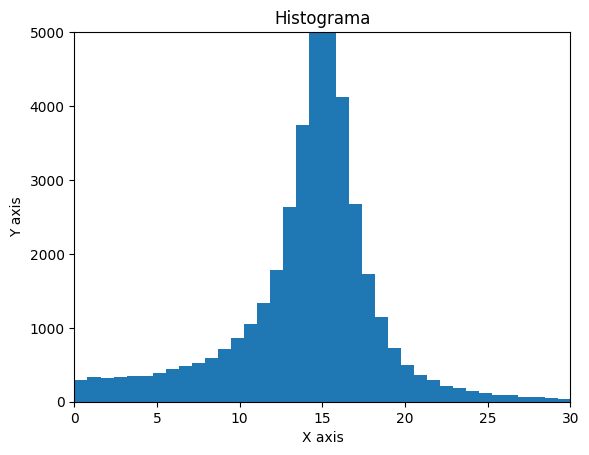

In [ ]:
# Histograma de datos de verificación
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 30)
plt.ylim(0, 5000)
plt.hist(f_verif, bins=200)
plt.show()

### Opcional

De la misma manera, si realizamos un buen análisis, aplicando los datos de verificación a Fitter debería ajustar a la función previamente sugerida:

In [ ]:
v = Fitter(f_verif, distributions=['uniform', 'rel_breitwigner','skewcauchy','norminvgauss'])

In [ ]:
v.fit()

2024-04-08 03:51:27.525 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.052388)
2024-04-08 03:51:29.927 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted skewcauchy distribution with error=0.000409)
2024-04-08 03:51:32.050 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rel_breitwigner distribution with error=0.005509)
2024-04-08 03:51:59.970 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED norminvgauss distribution (taking more than 30 seconds)


2024-04-08 03:52:12.518 | WARNING  | fitter.fitter:plot_pdf:417 - norminvgauss was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
skewcauchy,0.000409,1710.045206,1735.835111,inf,0.052454,4.316288e-96
rel_breitwigner,0.005509,1903.010356,1928.800260,inf,0.114003,0.000000e+00
uniform,0.052388,1016.514751,1033.708020,inf,0.825103,0.000000e+00
norminvgauss,inf,inf,inf,inf,NaN,NaN


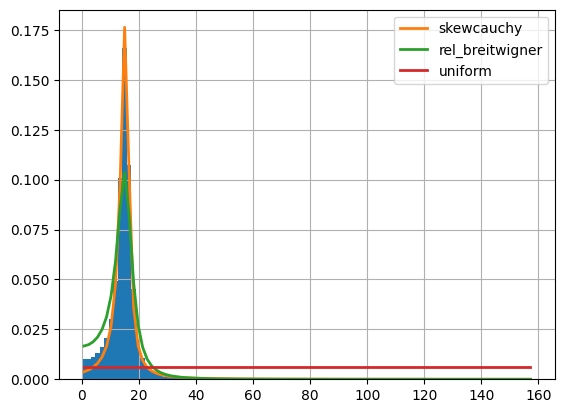

In [ ]:
v.summary(6)

## 7. Conclusión

Observando el array de datos generados con la función de *stats.rel_breitwigner* y posteriormente observando su distribución en el histograma podemos concluir sobre la similitud con los datos de origen.

Para ser mucho más exhaustivo podemos con este array simulado volver a ajustar los datos con Fitter como hicimos en la última parte del inciso 6, y entre la lista de funciones sugeridas por Fitter, vemos que nuevamente se encuentra la función *stats.rel_breitwigner*.
